In [46]:
names = open("names.txt").read().split("\n")

In [47]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [48]:
b = {}

for n in names[:]:
    chs = ["<S>"] + list(n) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
    

In [49]:
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [50]:
import torch

In [51]:
chars = sorted(list(set("".join(names))))
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi["."] = 0
itos = {i: ch for ch, i in stoi.items()}
n_chars = len(chars) + 1
N = torch.zeros((n_chars, n_chars), dtype=torch.int32)
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [52]:
for n in names[:]:
    chs = ["."] + list(n) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        N[stoi[ch1], stoi[ch2]] += 1

(-0.5, 26.5, 26.5, -0.5)

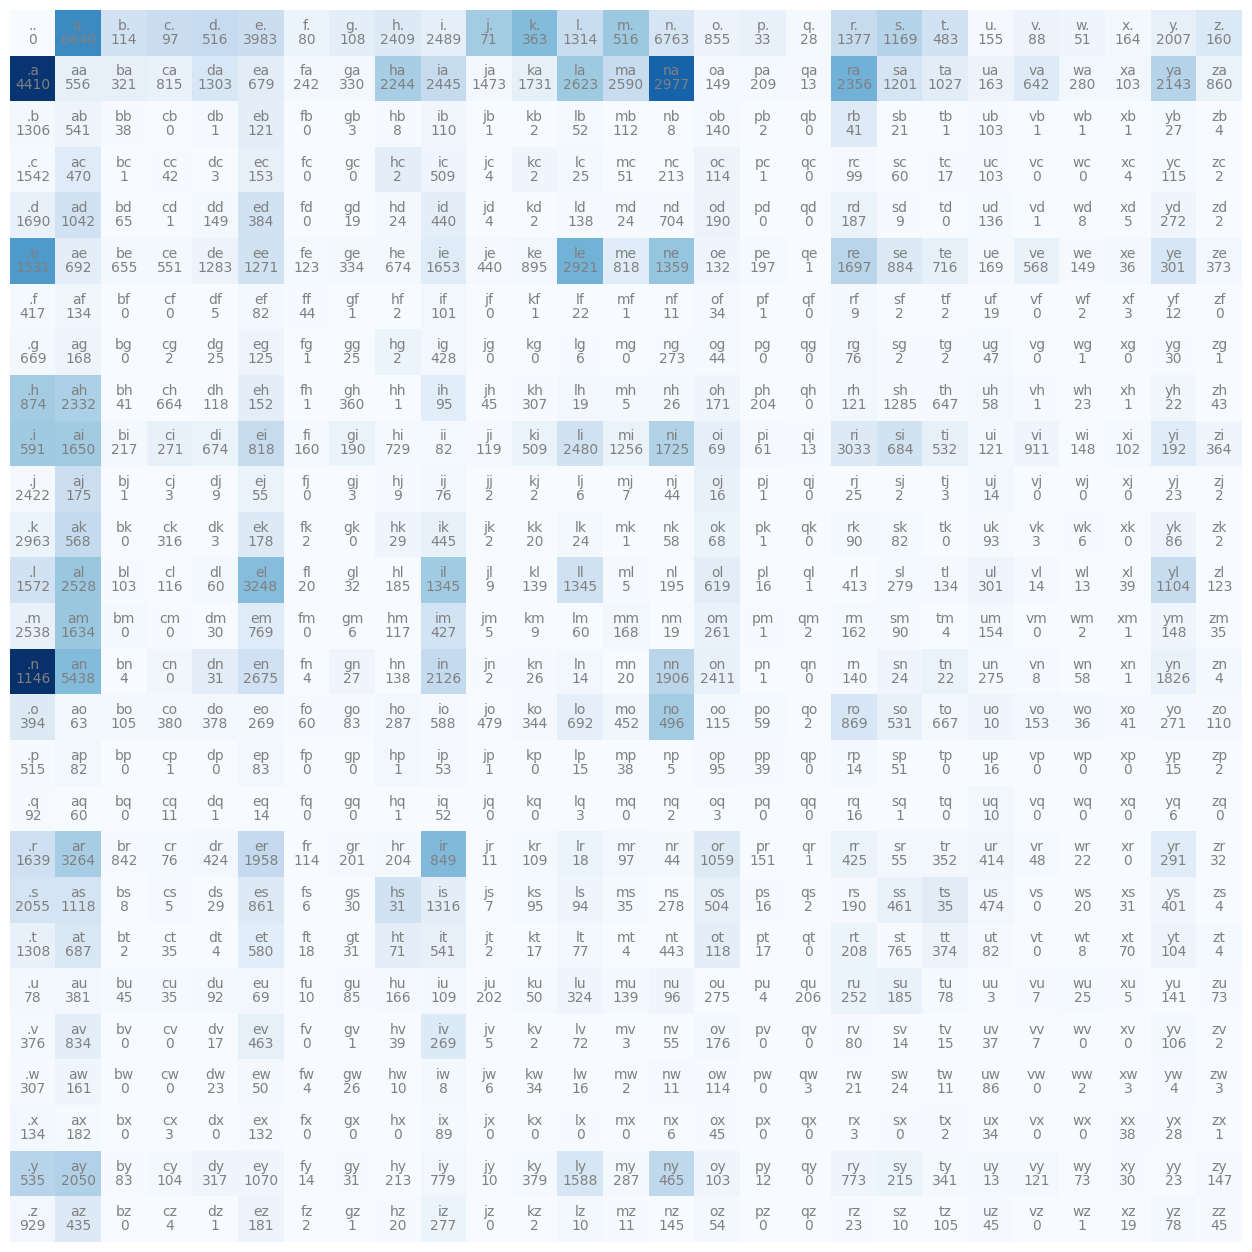

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(i, j, chstr, ha='center', va='bottom', color="gray")
        plt.text(i, j, N[i, j].item(), ha='center', va='top', color="gray")

plt.axis("off")

Convert counts to probabilities: 

In [62]:
p = N[0] / N[0].sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [87]:
g = torch.Generator().manual_seed(2)
ix = torch.multinomial(p, 1, generator=g).item()
itos[ix]

'a'

In [83]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [96]:
P = N.float() / N.sum(dim=1, keepdim=True)

In [99]:
g = torch.Generator().manual_seed(0)
for _ in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = torch.ones_like(p) / p.shape[0]
        ix = torch.multinomial(p, 1, generator=g).item()
        out.append(itos[ix])
        if itos[ix] == ".": 
            break
    print("".join(out))
        

kedan.
frenakey.
aderyna.
salyler.
rion.
kefwajusi.
ziala.
kanocikhilinileea.
m.
cyl.
